# MNIST

In [1]:
from conx import Network, Layer, Conv2DLayer, MaxPool2DLayer, FlattenLayer

Using Theano backend.


In [2]:
net = Network("MNIST")
net.add(Layer("input", shape=784, vshape=(28, 28), colormap="hot", minmax=(0,1)))
net.add(Layer("hidden1", shape=512, vshape=(16,32), activation='relu', dropout=0.2))
net.add(Layer("hidden2", shape=512, vshape=(16,32), activation='relu', dropout=0.2))
net.add(Layer("output", shape=10, activation='softmax'))

net.connect('input', 'hidden1')
net.connect('hidden1', 'hidden2')
net.connect('hidden2', 'output')

In [3]:
net.compile(loss='mean_squared_error',
            optimizer='sgd')

In [4]:
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

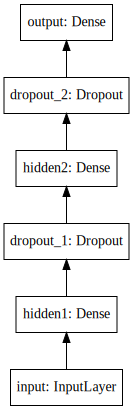

In [5]:
SVG(model_to_dot(net.model, rankdir="BT").create_svg())

In [6]:
net.load_mnist_dataset()
#net.rescale_inputs((0,255), (0,1), 'float32')
#net.shuffle_dataset()
net.slice_dataset(0, 100)
net.reshape_inputs(784)
#net.split_dataset(100)

Input Summary:
   count  : 70000
   shape  : (28, 28, 1)
   range  : (0.0, 1.0)
Target Summary:
   count  : 70000
   shape  : (10,)
   range  : (0.0, 1.0)
Slicing dataset 0:100...
Input Summary:
   count  : 100
   shape  : (28, 28, 1)
   range  : (0.0, 1.0)
Target Summary:
   count  : 100
   shape  : (10,)
   range  : (0.0, 1.0)
Input Summary:
   count  : 100
   shape  : (784,)
   range  : (0.0, 1.0)
Target Summary:
   count  : 100
   shape  : (10,)
   range  : (0.0, 1.0)


In [7]:
widget = net.dashboard()

<IPython.core.display.Javascript object>

In [8]:
widget

In [9]:
net.train(100, verbose=0)
#net.test()

(100, 0.091322362422943115, 0.079999998211860657, 0.0)

In [10]:
%%time
for i in range(100):
    net.propagate(net.get_input(i))

CPU times: user 7.06 s, sys: 348 ms, total: 7.4 s
Wall time: 7.26 s


In [11]:
from conx import Network, Layer, Conv2DLayer, MaxPool2DLayer, FlattenLayer

In [12]:
net = Network("MNIST-CNN")
net.add(Layer("input", (28,28,1), colormap="hot", minmax=(0,1)))
net.add(Conv2DLayer("Conv2D-1", 16, (5,5), activation="relu"))
net.add(MaxPool2DLayer("maxpool1", (2,2)))
net.add(Conv2DLayer("Conv2D-2", 132, (5,5), activation="relu")) 
net.add(MaxPool2DLayer("maxpool2", (2,2)))
net.add(FlattenLayer("flatten", visible=False))
net.add(Layer("hidden", 1000, activation='relu', vshape=(8,125), image_maxdim=500))
net.add(Layer("output", 10, activation='softmax'))

net.connect()

In [13]:
net.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [14]:
net.load_mnist_dataset()

Input Summary:
   count  : 70000
   shape  : (28, 28, 1)
   range  : (0.0, 1.0)
Target Summary:
   count  : 70000
   shape  : (10,)
   range  : (0.0, 1.0)


In [15]:
net.slice_dataset(100)

Slicing dataset 0:100...
Input Summary:
   count  : 100
   shape  : (28, 28, 1)
   range  : (0.0, 1.0)
Target Summary:
   count  : 100
   shape  : (10,)
   range  : (0.0, 1.0)


In [16]:
net.train()

Training...
Epoch 1/1
100/100 [==============================] - 0s - loss: 0.3266 - acc: 0.9000
Epoch #    1 | train error 0.32662 | train accuracy 0.90000 | validate% 0.00000


In [17]:
net.dashboard()

<IPython.core.display.Javascript object>

In [20]:
for i in range(10):
    net.propagate(net.get_input(i))

In [19]:
net.train(epochs=100, accuracy=.7)

Training...
Epoch #    2 | train error 0.30793 | train accuracy 0.90200 | validate% 0.00000
Epoch #    3 | train error 0.31585 | train accuracy 0.90000 | validate% 0.00000
Epoch #    4 | train error 0.27315 | train accuracy 0.90000 | validate% 0.01000
Epoch #    5 | train error 0.19895 | train accuracy 0.92000 | validate% 0.00000
Epoch #    6 | train error 0.23280 | train accuracy 0.92800 | validate% 0.18000
Epoch #    7 | train error 0.14935 | train accuracy 0.93600 | validate% 0.12000
Epoch #    8 | train error 0.16329 | train accuracy 0.94100 | validate% 0.06000
Epoch #    9 | train error 0.11927 | train accuracy 0.95900 | validate% 0.52000
Epoch #   10 | train error 0.07434 | train accuracy 0.97800 | validate% 0.45000
Epoch #   11 | train error 0.06069 | train accuracy 0.97500 | validate% 0.61000
Epoch #   12 | train error 0.08196 | train accuracy 0.97700 | validate% 0.55000
Epoch #   13 | train error 0.04678 | train accuracy 0.98600 | validate% 0.72000
Epoch #   13 | train error 0